## Iris Dataset

### Objectives:
1. Read the dataset to the python environment.
2. Do necessary `pre-processing` steps.
3. Find out which classification model gives the best result to predict `iris species`.(also do random forest algorithm)

### Importing relevant libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

#### Setting up visualization

In [109]:
%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams.update({'figure.dpi': 100})

### 1. Reading the dataset into python environment

In [110]:
df = pd.read_excel('Data/iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Preliminary analysis

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [112]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [113]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [114]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Classification, dtype: int64

#### Insights:
- The dataset contains the sepal and petal measurements of the iris flower
- The dataset contains information about three species of iris namely
> Iris Setosa, Iris Virginica, Iris Versicolor
- The sepal length, petal length, and sepal width columns contain null values

### 2. Preprocessing steps

#### Handling null values

In [115]:
df.loc[df['SL'].isnull()]

,SL,SW,PL,PW,Classification
2,NaN,3.2,1.3,0.2,Iris-setosa
21,NaN,3.7,1.5,0.4,Iris-setosa
39,NaN,3.4,1.5,0.2,Iris-setosa
51,NaN,3.2,4.5,1.5,Iris-versicolor
85,NaN,3.4,4.5,1.6,Iris-versicolor
106,NaN,2.5,4.5,1.7,Iris-virginica
141,NaN,3.1,5.1,2.3,Iris-virginica


In [116]:
df.loc[df['SW'].isnull()]

,SL,SW,PL,PW,Classification
10,5.4,NaN,1.5,0.2,Iris-setosa
27,5.2,NaN,1.5,0.2,Iris-setosa
43,5.0,NaN,1.6,0.6,Iris-setosa
72,6.3,NaN,4.9,1.5,Iris-versicolor
98,5.1,NaN,3.0,1.1,Iris-versicolor
124,6.7,NaN,5.7,2.1,Iris-virginica


In [117]:
df.loc[df['PL'].isnull()]

,SL,SW,PL,PW,Classification
28,5.2,3.4,NaN,0.2,Iris-setosa
42,4.4,3.2,NaN,0.2,Iris-setosa
56,6.3,3.3,NaN,1.6,Iris-versicolor
94,5.6,2.7,NaN,1.3,Iris-versicolor
109,7.2,3.6,NaN,2.5,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica


#### KDE Plot of `petal length` and `petal width`

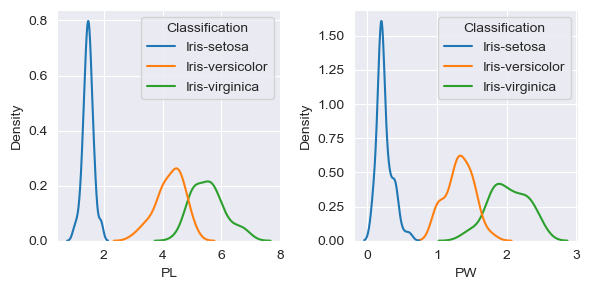

In [118]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
sns.kdeplot(data = df, x='PL', hue='Classification')

plt.subplot(1, 2, 2)
sns.kdeplot(data = df, x = 'PW', hue = 'Classification')

plt.tight_layout()

#### KDE Plot of `sepal length` and `sepal width`

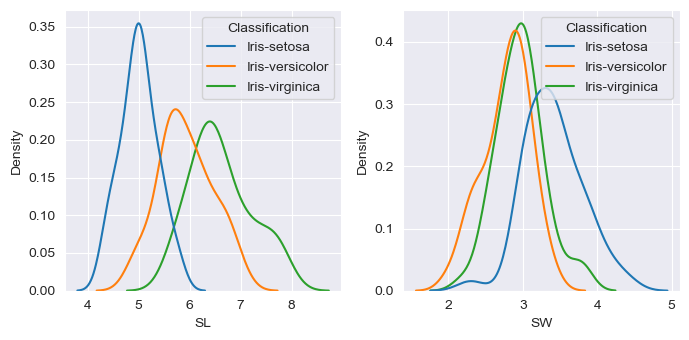

In [119]:
plt.figure(figsize=(7, 3.5))

plt.subplot(1, 2, 1)
sns.kdeplot(data = df, x = 'SL', hue = 'Classification')

plt.subplot(1, 2, 2)
sns.kdeplot(data = df, x = 'SW', hue = 'Classification')

plt.tight_layout()

#### Observations:
- From the above plots and also because of low standard deviation, it appears better to fill null values with means of respective species.

In [120]:
df.groupby('Classification')['SL'].mean()

Classification
Iris-setosa        5.008511
Iris-versicolor    5.925000
Iris-virginica     6.616667
Name: SL, dtype: float64

In [121]:
df['SL'].fillna(df.groupby('Classification')['SL'].transform('mean'), inplace=True)

In [122]:
df['SL'].isnull().sum()

0

In [123]:
df.groupby('Classification')['SW'].mean()

Classification
Iris-setosa        3.408511
Iris-versicolor    2.781250
Iris-virginica     2.967347
Name: SW, dtype: float64

In [124]:
df['SW'].fillna(df.groupby('Classification')['SW'].transform('mean'), inplace=True)

In [125]:
df['SW'].isnull().sum()

0

In [126]:
df.groupby('Classification')['PL'].mean()

Classification
Iris-setosa        1.468750
Iris-versicolor    4.252083
Iris-virginica     5.547917
Name: PL, dtype: float64

In [127]:
df.groupby('Classification')['PL'].median()

Classification
Iris-setosa        1.50
Iris-versicolor    4.35
Iris-virginica     5.55
Name: PL, dtype: float64

In [128]:
df['PL'].fillna(df.groupby('Classification')['PL'].transform('mean'), inplace=True)

In [129]:
df['PL'].isnull().sum()

0

In [130]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

**All missing values handled successfully**

#### Handling outliers

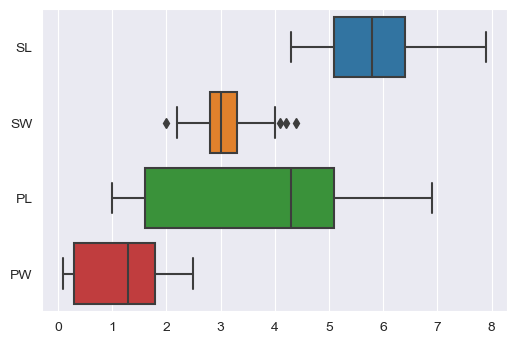

In [131]:
sns.boxplot(data=df, orient='h')
plt.show()

In [132]:
q1 = df['SW'].quantile(q=0.25, interpolation='midpoint')
q3 = df['SW'].quantile(q=0.75, interpolation='midpoint')
iqr = q3 - q1
q_limit = 1.5 * (iqr)

In [133]:
print(f"Q1 is {q1}\nQ2 is {q3}\nInter Quartile Range is {iqr} \n 1.5 times IQR is {q_limit}")

Q1 is 2.8
Q2 is 3.3
Inter Quartile Range is 0.5 
 1.5 times IQR is 0.75


In [134]:
lower_limit = q1 - q_limit
upper_limit = q3 + q_limit

In [135]:
print(f"\nThe lower limit is {lower_limit} \n\nThe upper limit is {upper_limit}")


The lower limit is 2.05 

The upper limit is 4.05


In [136]:
df.loc[(df['SW'] > 4.05) ^ (df['SW'] < 2.05)]

,SL,SW,PL,PW,Classification
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


Since there are very few outliers and they are very close to upper and lower limits, they are kept in the data.

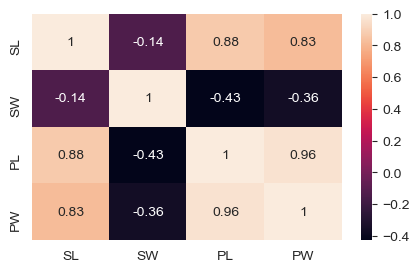

In [137]:
plt.figure(figsize=(5, 3))
corr_matrix = df.drop('Classification', axis=1).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

#### Label encoding the `classification` column

In [138]:
label_encoder = preprocessing.LabelEncoder()

In [139]:
X = df.drop('Classification', axis = 1)
y = df['Classification']

In [140]:
y = label_encoder.fit_transform(y)

#### Applying standard scalar method to X

In [141]:
scalar = preprocessing.StandardScaler()

In [142]:
X = scalar.fit_transform(X)

## 3. Classification Models

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### a. Logistic Regression

In [144]:
logit_regrsn = LogisticRegression()
model = logit_regrsn.fit(X_train, y_train)

In [145]:
predictions = model.predict(X_test)

In [146]:
print("Accuracy score is: ", round(accuracy_score(y_test, predictions), 3))

Accuracy score is:  0.967


In [147]:
confusion_matrix(y_test, predictions)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [148]:
label_encoder.inverse_transform(model.predict([[6, 3, 5, 2]]))

array(['Iris-virginica'], dtype=object)

- We get an accuracy score of 96.67% and the confusion matrix shows only one misclassification.

#### Cross validation

In [149]:
scores = cross_val_score(logit_regrsn, X,y, scoring="accuracy", cv=10)
print(scores)

[1.         1.         1.         1.         0.93333333 0.93333333
 0.8        1.         1.         1.        ]


In [150]:
print(f"Accuracy {np.round( scores.mean()*100,2)}  Standard dev {np.round( scores.std()*100,2)}")

Accuracy 96.67  Standard dev 6.15


**After 10 fold cross validation, the logistic regression model has 96.67% accuracy with a standard deviation of 6.15%**

### b. KNN Classification

In [151]:
accu_values = []
neighbors = np.arange(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    accu_values.append(acc_score)

In [152]:
print(accu_values)

[1.0, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


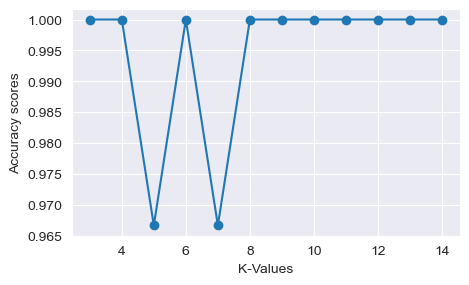

In [154]:
plt.figure(figsize = (5, 3))
plt.plot(neighbors, accu_values, 'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy scores')
plt.show()

- From the plot, K-value of 8 and above gives consistent good predictions

In [155]:
classifier = KNeighborsClassifier(n_neighbors=8, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score * 100, '%')

100.0 %


#### Cross validation

In [156]:
scores = cross_val_score(classifier, X,y, scoring="accuracy", cv=10)
print(scores)

[1.         0.93333333 1.         0.93333333 1.         1.
 0.93333333 0.93333333 1.         0.93333333]


In [157]:
print(f"Accuracy {np.round( scores.mean()*100,2)}  Standard dev {np.round( scores.std()*100,2)}")

Accuracy 96.67  Standard dev 3.33


**After 10 fold cross validation, the KNN model has 96.67% accuracy with a standard deviation of 3.33%**

### c. Support vector machine

In [158]:
supp_vector = SVC(kernel='linear')
svm_model = supp_vector.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [159]:
accuracy_score(y_test, svm_predictions)

0.9666666666666667

In [160]:
supp_vector = SVC(kernel='poly', degree=3)
svm_model = supp_vector.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [161]:
accuracy_score(y_test, svm_predictions)

0.9333333333333333

In [162]:
supp_vector = SVC(kernel='rbf')
svm_model = supp_vector.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [163]:
accuracy_score(y_test, svm_predictions)

0.9666666666666667

- Radial bias fucnction kernel and linear kernel gives highest accuracy

#### Cross validation

In [164]:
scores = cross_val_score(supp_vector, X,y, scoring="accuracy", cv=10)
print(scores)

[1.         0.93333333 1.         0.93333333 1.         0.93333333
 0.86666667 1.         1.         1.        ]


In [165]:
print(f"Accuracy {np.round( scores.mean()*100,2)}  Standard dev {np.round( scores.std()*100,2)}")

Accuracy 96.67  Standard dev 4.47


**After 10 fold cross validation, the SVM model using rbf kernel has 96.67% accuracy with a standard deviation of 4.47%**

### d. Decision Tree Classifier

In [166]:
dt_classifier = DecisionTreeClassifier()
dt_model = dt_classifier.fit(X_train, y_train)
dt_predict = dt_classifier.predict(X_test)

In [167]:
accuracy_score(dt_predict, y_test)

1.0

In [168]:
scores = cross_val_score(dt_classifier, X,y, scoring="accuracy", cv=10)
print(scores)

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]


In [169]:
print(f"Accuracy {np.round( scores.mean()*100,2)}  Standard dev {np.round( scores.std()*100,2)}")

Accuracy 96.0  Standard dev 4.42


**After 10 fold cross validation, the decision tree model using default parameters has 96.0% accuracy with a standard deviation of 4.42%**

### e. Random Forest Classifier

In [170]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
rf_predict = rf_model.predict(X_test)

In [171]:
accuracy_score(rf_predict, y_test)

1.0

In [172]:
f1_score(rf_predict, y_test, average='micro')

1.0

#### Feature Importance

In [173]:
x_df = df.drop('Classification', axis = 1)
pd.Series(rf_model.feature_importances_, index=x_df.columns).sort_values(ascending=False) * 100

PL    44.270725
PW    40.011374
SL    12.491634
SW     3.226267
dtype: float64

#### Hyperparameter tuning

Using grid search method

In [174]:
parameters ={'max_depth': [10, 20, 30],
'criterion' : ['gini', 'entropy'],
'min_samples_split': [2,5,10],
'n_estimators': [100,200,400]}

In [175]:
param_size = ParameterGrid(parameters)
len(param_size)

54

In [176]:
grid_search = RandomForestClassifier()
grid_search = GridSearchCV(grid_search, parameters, cv=5, scoring='accuracy',n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)
print('\nBest Params: ', grid_result.best_params_)
print('\nBest Score: ', grid_result.best_score_)


Best Params:  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100}

Best Score:  0.9666666666666666


**After hyperparameter tuning and CV, the random forest model has 96.67% accuracy.**

### Conclusion:
- After exhaustive testing and cross validations, The K-Nearest Neighbor with 96.67% accuracy and 3.33% standard deviation appears to be the best model for the given dataset